# Font Classifier - Created by Noopur Singh

### Problem Statement : 

#### Create a Font Classifier. The classifier should take a single image as input and return the name (or label) of the font used in the image from a predefined list of 10 fonts.


### Importing the necessary libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
from IPython.display import display, Markdown

%matplotlib inline

import PIL
from PIL import Image

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D , UpSampling2D ,Conv2DTranspose
from keras.optimizers import SGD
from keras.optimizers.schedules import ExponentialDecay
from keras import callbacks
from keras.models import load_model
from keras.preprocessing.image import img_to_array

### Exploratory Data Analysis

In [77]:
# Checking the data present in the directory

print(os.listdir('data'))

['AlexBrush', 'I Love Glitter', '.DS_Store', 'Holligate Signature', 'Canterbury', 'AguafinaScript', 'James Fajardo', 'GreatVibes', 'Allura', 'alsscrp', 'OpenSans']


In [78]:
# Accessing the fonts within the directory

data_path = 'data/'
font_AguafinaScript = os.path.join(data_path+'AguafinaScript')

In [79]:
# Listing the images present within the font folder

font_AguafinaScript_files = os.listdir(font_AguafinaScript)

In [80]:
# Checking the head of the data

print(font_AguafinaScript_files[:5])

['image_15.png', 'image_29.png', 'image_28.png', 'image_14.png', 'image_16.png']


In [81]:
# Listing all possible font directories in folder

font_AlexBrush = os.path.join(data_path+'AlexBrush')

font_Allura = os.path.join(data_path+'Allura')

font_alsscrp = os.path.join(data_path+'alsscrp')

font_Canterbury = os.path.join(data_path+'Canterbury')

font_GreatVibes = os.path.join(data_path+'GreatVibes')

font_Holligate_Signature = os.path.join(data_path+'Holligate Signature')

font_I_Love_Glitter = os.path.join(data_path+'I Love Glitter')

font_James_Fajardo = os.path.join(data_path+'James Fajardo')

font_OpenSans = os.path.join(data_path+'OpenSans')

# Making list of all directories

dir_list = [font_AguafinaScript,font_AlexBrush,font_Allura,font_alsscrp,font_Canterbury,font_GreatVibes,
            font_Holligate_Signature,font_I_Love_Glitter,font_James_Fajardo,font_OpenSans]



#### Viewing the images from different fonts 

## <b><u>Images from AguafinaScript, Total Images: 83</u></b>

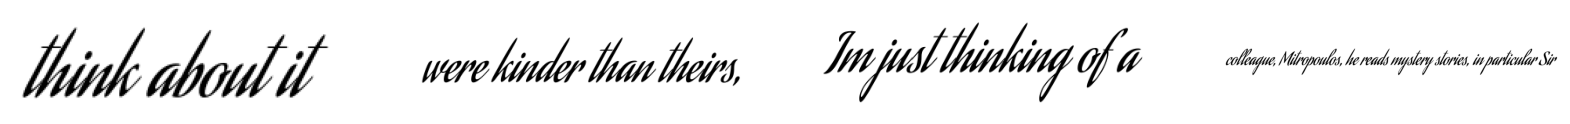

## <b><u>Images from AlexBrush, Total Images: 78</u></b>

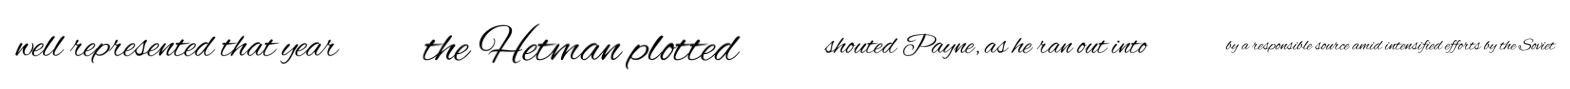

## <b><u>Images from Allura, Total Images: 70</u></b>

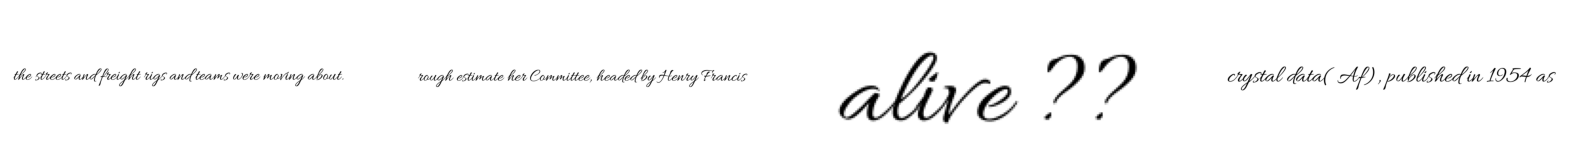

## <b><u>Images from alsscrp, Total Images: 102</u></b>

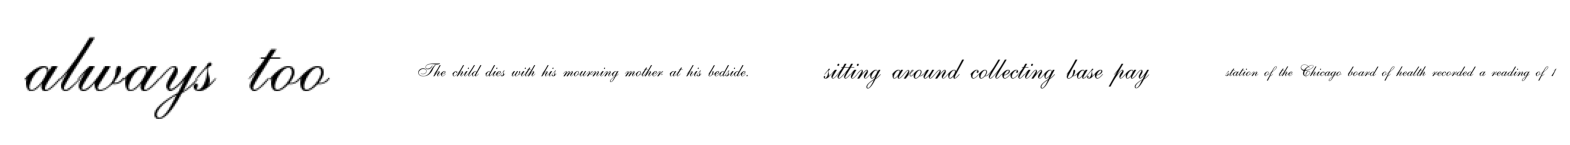

## <b><u>Images from Canterbury, Total Images: 76</u></b>

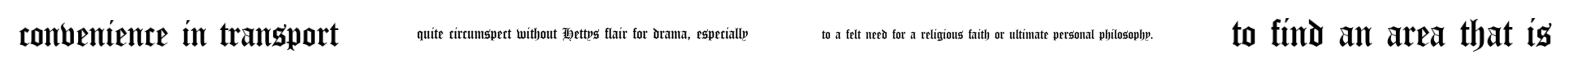

## <b><u>Images from GreatVibes, Total Images: 76</u></b>

## <b><u>Images from Holligate Signature, Total Images: 82</u></b>

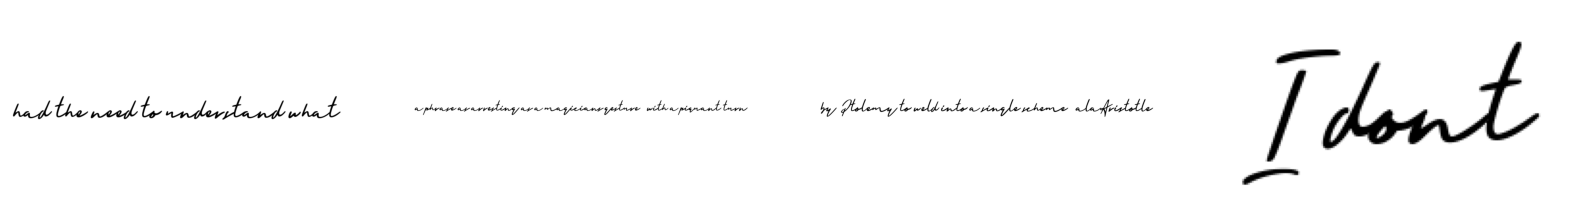

## <b><u>Images from I Love Glitter, Total Images: 72</u></b>

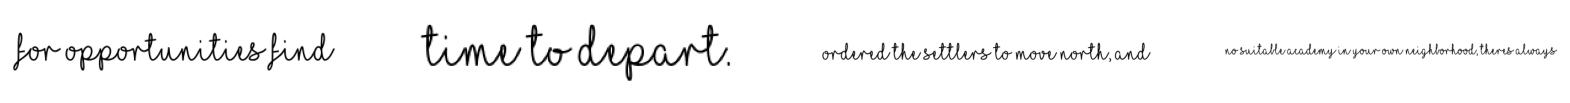

## <b><u>Images from James Fajardo, Total Images: 80</u></b>

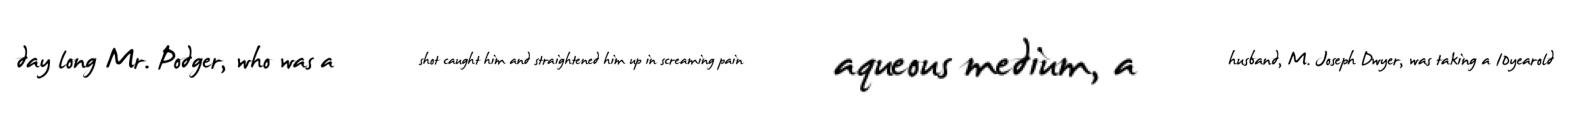

## <b><u>Images from OpenSans, Total Images: 73</u></b>

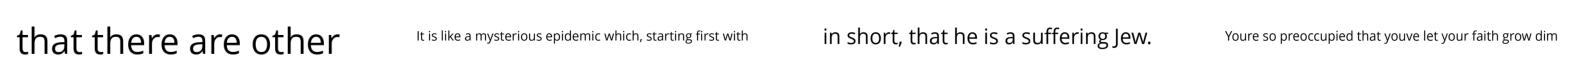

In [82]:
for dir_name in dir_list:

    image_list = [os.path.join(dir_name,fname) for fname in os.listdir(dir_name)[0:4]]

    total_images = len(os.listdir(dir_name))

    display(Markdown(f"## <b><u>Images from {dir_name.split('/')[-1]}, Total Images: {total_images}</u></b>"))


    fig, axes = plt.subplots(nrows=1, ncols=len(image_list), figsize=(20, 5))

    for i, img_path in enumerate(image_list):

        img = mpimg.imread(img_path)
        if len(image_list) == 1:
            ax = axes
        else:
            ax = axes[i]
        ax.imshow(img)
        ax.axis('off')
    plt.show()

### Data Collection

##### For testing purposes, images are generated using various .ttf font files from the fonts directory. Each font file is used to render specified text strings on images of a fixed size. The generated test images are saved in the output directory with filenames indicating the font and text content.

#### Final Dataset for Training

###### The final dataset used for training and evaluation is provided in the data folder. This dataset is well-organized, with subdirectories for each font type. Each subdirectory contains images of text rendered in that font. This structure allows for straightforward loading and preprocessing of the data, ensuring consistency and ease of use in model training.

##### Images: The dataset includes multiple images per font, each labeled according to the font type.
##### Labels: The labels are derived from the directory names, making it easy to map each image to its corresponding font class.

### Data Preprocessing

#### Loading and Resizing: Images are loaded and resized to a uniform size.

In [83]:
# Funtion to convert the labels into integers

def convert_label(label):
    if label == 'AguafinaScript':
        return 0
    elif label == 'AlexBrush':
        return 1
    elif label == 'Allura':
        return 2
    elif label == 'alsscrp':
        return 3
    elif label == 'Canterbury':
        return 4
    elif label == 'GreatVibes':
        return 5
    elif label == 'Holligate Signature':
        return 6
    elif label == 'I Love Glitter':
        return 7
    elif label == 'James Fajardo':
        return 8
    elif label == 'OpenSans':
        return 9

In [84]:
X_data = []

Y_data = []


for dir_name in dir_list:

    font_label = dir_name.split(os.path.sep)[-1]

    num_label = convert_label(font_label)

    for fname in os.listdir(dir_name):

        try:
            img = Image.open(os.path.join(dir_name,fname))

            img=img.resize((105,105))

            img.load()

            img_data = np.asarray(img, dtype=np.int16)
            X_data.append(img_data)
            Y_data.append(num_label)
        except:
            None


            
print(f'Length of X data: {len(X_data)}')
print(f'Length of Y data: {len(Y_data)}')


Length of X data: 792
Length of Y data: 792


#### The pixel values of the images are normalized to the range [0, 1] by dividing by 255.0

In [85]:
# converting the input data to a NumPy array of type float and normalizing the pixel values

X_data = np.asarray(X_data, dtype="float") / 255.0
Y_data = np.array(Y_data)

#### Splitting the dataset into train and test. The test set is considered to be 25%

#### Performing one-hot encoding on the dependent value

In [88]:

(trainX, testX, trainY, testY) = train_test_split(X_data,Y_data, test_size=0.25, random_state=42)

# Applying one-hot encoding
trainY = to_categorical(trainY, num_classes=10)
testY = to_categorical(testY, num_classes=10)

### Model Building

#### Got model with very bad accuracy and loss_value by using below conv layers

In [ ]:

# model = Sequential([
#     # This is the first convolution
#     Conv2D(32, (3, 3), activation='relu', input_shape=(105, 105, 3)),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),
#     Dropout(0.25),
    
#     # The second convolution
#     Conv2D(64, (3, 3),  activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),
#     Dropout(0.25),
    
#     # The third convolution
#     Conv2D(128, (3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),
#     Dropout(0.25),
    
#     # The fourth convolution
#     Conv2D(256, (3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),
#     Dropout(0.25),
    
#     Flatten(),
    
#     Dense(512, activation = 'relu'),
#     Dropout(0.5),
    
#     Dense(10, activation='softmax')
# ])

#### Rebuilding model using lesser conv layers with higher dimesnions of parameters

In [97]:
model = Sequential([
    
    # The first convolution
    Conv2D(64, (48,48), activation='relu', input_shape=(105,105,3)),
    MaxPooling2D(2, 2),
    
    # The second convolution
    
    Conv2D(128, (24,24), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    
    # 512 neuron hidden layer
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

In [98]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 58, 58, 64)     │       442,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 29, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 6, 6, 128)      │     4,718,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,756,618 (21.96 MB)

 Trainable params: 5,756,618 (21.96 MB)

 Non-trainable params: 0 (0.00 B)

#### Setting up an SGD optimizer with Nesterov momentum and an exponentially decaying learning rate, and then compiling the model to use this optimizer with mean squared error loss and accuracy as a metric.

In [99]:

lr_schedule = ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)
sgd = SGD(learning_rate=lr_schedule, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])


### Rationale for Chosen Metrics

#### Accuracy is chosen as the primary metric to directly measure the proportion of correct predictions, which is a straightforward indicator of how well the classifier is performing.

#### Loss (Mean Squared Error) is monitored to ensure that the model is learning effectively and to provide an additional measure of performance during training.

#### By using these metrics, I am evaluating the model's performance comprehensively and ensuring that it meets the objectives of font classification effectively.

### Model Training

#### Training the model with early stopping and checkpointing based on validation loss, shuffling the data, splitting 20% for validation, and then evaluating the model on the test data.

In [100]:
filepath='top_model.keras' # The best model will be saved as this

batch_size = 64
epochs = 100

early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

model.fit(trainX, trainY,shuffle=True,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          verbose=1,
          validation_data=(testX, testY),callbacks=[early_stopping,checkpoint])
score = model.evaluate(testX, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1139 - loss: 0.0900
Epoch 1: val_loss improved from inf to 0.08987, saving model to top_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 65s 6s/step - accuracy: 0.1147 - loss: 0.0900 - val_accuracy: 0.1313 - val_loss: 0.0899
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1261 - loss: 0.0900
Epoch 2: val_loss improved from 0.08987 to 0.08966, saving model to top_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 65s 6s/step - accuracy: 0.1273 - loss: 0.0900 - val_accuracy: 0.1263 - val_loss: 0.0897
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1116 - loss: 0.0896
Epoch 3: val_loss improved from 0.08966 to 0.08932, saving model to top_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - accuracy: 0.1128 - loss: 0.0896 - val_accuracy: 0.1313 - val_loss: 0.0893
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1180 - loss: 0.0897
Epoch 4: val_loss improved from 0.08932 to 0.08882, saving model to top

Epoch 25/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7001 - loss: 0.0407
Epoch 25: val_loss improved from 0.04213 to 0.03942, saving model to top_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 66s 7s/step - accuracy: 0.7003 - loss: 0.0407 - val_accuracy: 0.7273 - val_loss: 0.0394
Epoch 26/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7358 - loss: 0.0374
Epoch 26: val_loss did not improve from 0.03942
10/10 ━━━━━━━━━━━━━━━━━━━━ 66s 7s/step - accuracy: 0.7351 - loss: 0.0374 - val_accuracy: 0.6970 - val_loss: 0.0409
Epoch 27/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7298 - loss: 0.0375
Epoch 27: val_loss did not improve from 0.03942
10/10 ━━━━━━━━━━━━━━━━━━━━ 66s 7s/step - accuracy: 0.7300 - loss: 0.0375 - val_accuracy: 0.7424 - val_loss: 0.0396
Epoch 28/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7110 - loss: 0.0390
Epoch 28: val_loss improved from 0.03942 to 0.03716, saving model to top_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 67s 7s/step - accuracy

Epoch 50/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8582 - loss: 0.0228
Epoch 50: val_loss improved from 0.02595 to 0.02546, saving model to top_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 68s 7s/step - accuracy: 0.8575 - loss: 0.0228 - val_accuracy: 0.8384 - val_loss: 0.0255
Epoch 51/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8103 - loss: 0.0271
Epoch 51: val_loss did not improve from 0.02546
10/10 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - accuracy: 0.8137 - loss: 0.0267 - val_accuracy: 0.8283 - val_loss: 0.0267
Epoch 52/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8313 - loss: 0.0235
Epoch 52: val_loss did not improve from 0.02546
10/10 ━━━━━━━━━━━━━━━━━━━━ 71s 7s/step - accuracy: 0.8320 - loss: 0.0235 - val_accuracy: 0.7980 - val_loss: 0.0300
Epoch 53/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8587 - loss: 0.0208
Epoch 53: val_loss did not improve from 0.02546
10/10 ━━━━━━━━━━━━━━━━━━━━ 71s 7s/step - accuracy: 0.8584 - loss: 0.0209 - val_accurac

10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9054 - loss: 0.0155 - val_accuracy: 0.8838 - val_loss: 0.0184
Epoch 75/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9097 - loss: 0.0140
Epoch 75: val_loss did not improve from 0.01840
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9095 - loss: 0.0140 - val_accuracy: 0.8131 - val_loss: 0.0282
Epoch 76/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8650 - loss: 0.0202
Epoch 76: val_loss did not improve from 0.01840
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.8672 - loss: 0.0199 - val_accuracy: 0.8485 - val_loss: 0.0223
Epoch 77/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9162 - loss: 0.0139
Epoch 77: val_loss did not improve from 0.01840
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 3s/step - accuracy: 0.9161 - loss: 0.0139 - val_accuracy: 0.8535 - val_loss: 0.0203
Epoch 78/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9206 - loss: 0.0126
Epoch 78: val_loss improved from 0.01840 to 0.01814, sav

Epoch 100/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9001 - loss: 0.0147
Epoch 100: val_loss did not improve from 0.01601
10/10 ━━━━━━━━━━━━━━━━━━━━ 35s 4s/step - accuracy: 0.9020 - loss: 0.0145 - val_accuracy: 0.8889 - val_loss: 0.0167
Restoring model weights from the end of the best epoch: 93.
Test loss: 0.016009274870157242
Test accuracy: 0.8888888955116272


### Model Evaluation

#### Evaluating the model by loading the best model saved and passing the test dataset

In [102]:

model = load_model('top_model.keras')
score = model.evaluate(testX, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.016009274870157242
Test accuracy: 0.8888888955116272


#### Now, testing the model on unseen data

#### Created Test Fonts folder with newly generated font images using .ttf files. The script to generate the images is present in another ipyn file named 'Font image generation script'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


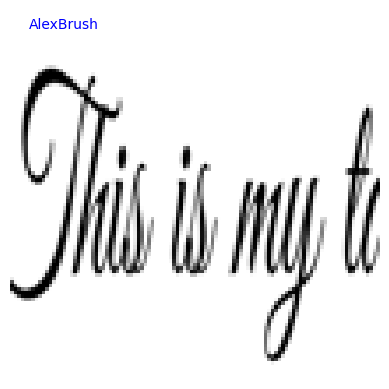

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


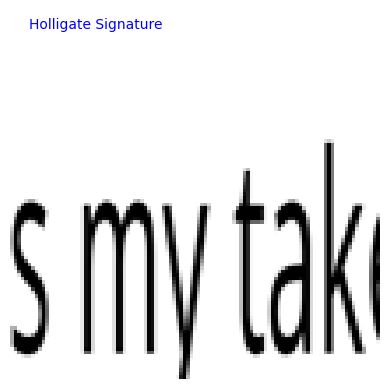

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


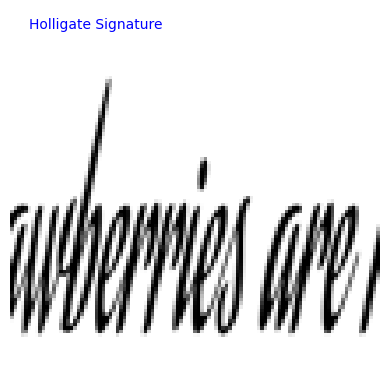

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


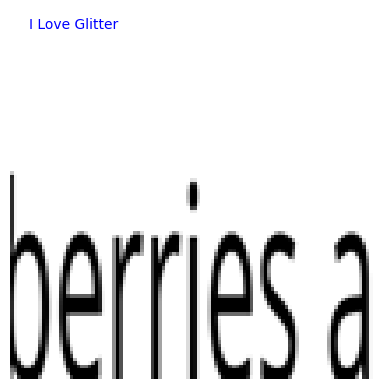

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


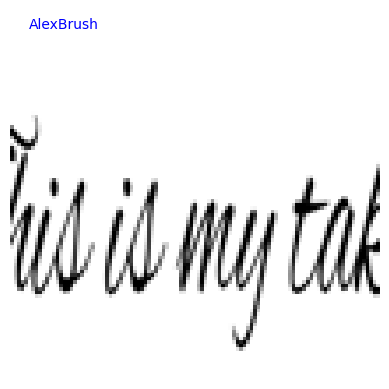

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


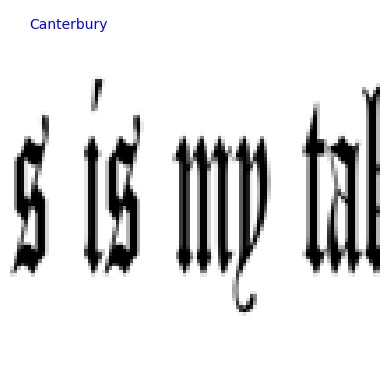

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


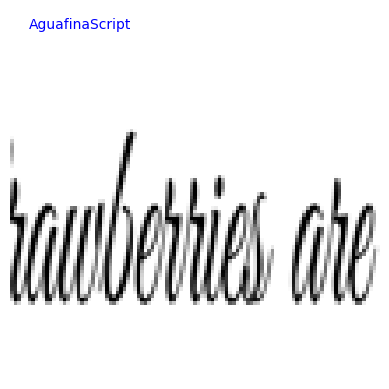

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


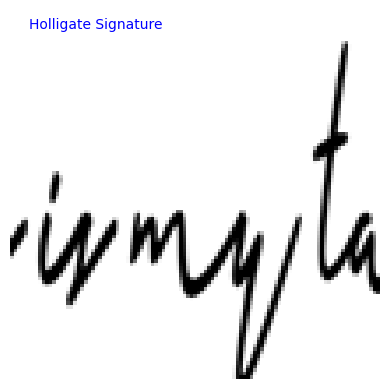

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


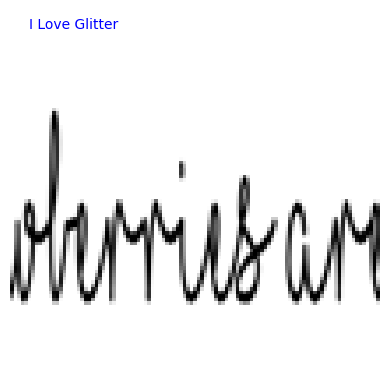

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


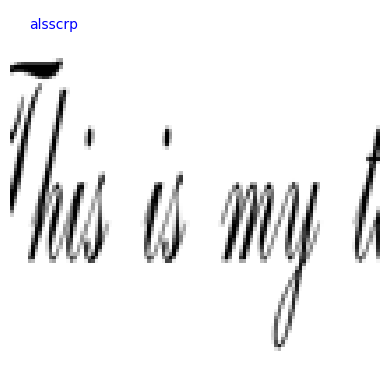

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


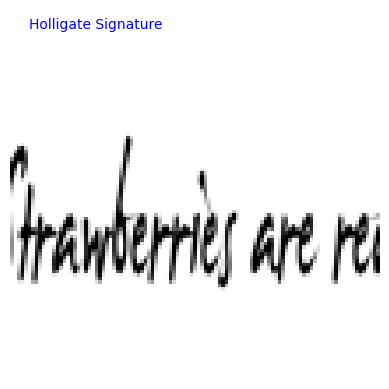

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


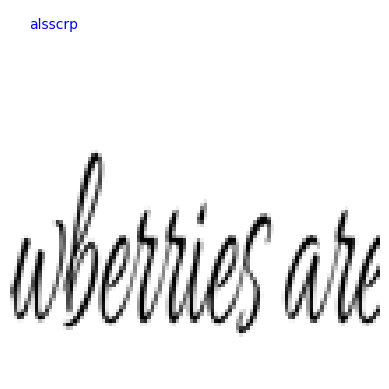

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


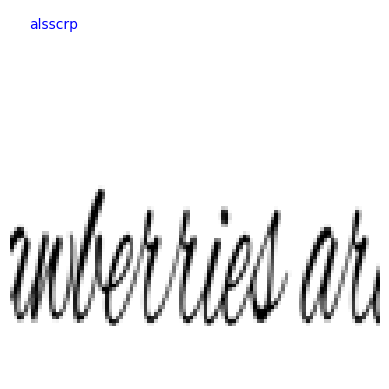

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


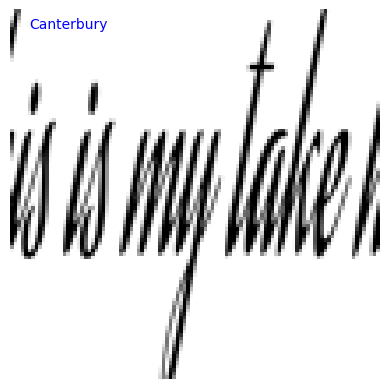

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


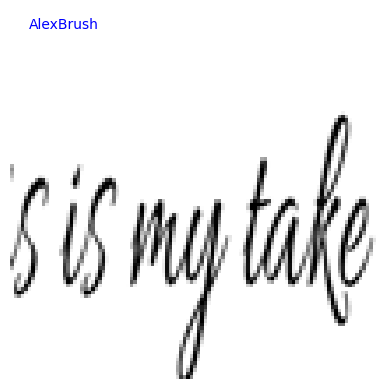

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


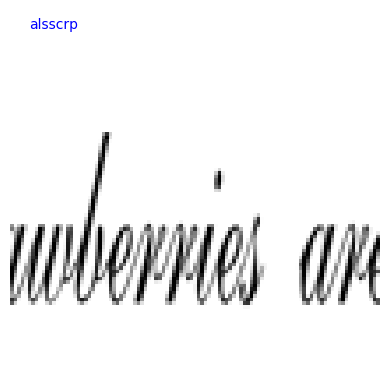

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


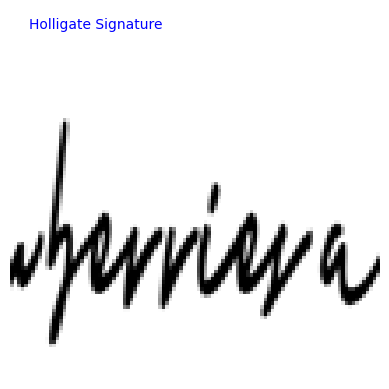

In [103]:
img_path='Test Fonts'

def rev_conv_label(label):
    labels = [
        'AguafinaScript', 'AlexBrush', 'Allura', 'alsscrp', 'Canterbury',
        'GreatVibes', 'Holligate Signature', 'I Love Glitter', 'James Fajardo', 'OpenSans'
    ]
    return labels[label]


# Process each image in the directory
for image_file in os.listdir(img_path):
    try:
    
        # Construct full image path
        full_path = os.path.join(img_path, image_file)
    
        # Open, convert to RGB, and convert to array
        pil_im = PIL.Image.open(full_path).convert('RGB')
        pil_im = pil_im.resize((105, 105))
        org_img = img_to_array(pil_im)
        org_img = np.expand_dims(org_img, axis=0)  # Model expects a batch of images

        # Normalize the image
        org_img = org_img.astype('float') / 255.0

        # Predict the font
        y = model.predict(org_img)
        y = np.argmax(y, axis=1)  # Get the index of the max log-probability
        label = rev_conv_label(y[0])  # Convert numerical label to actual font name

        # Plot and annotate image with predicted label
        fig, ax = plt.subplots()
        ax.imshow(pil_im, cmap='gray')
        ax.axis('off')  # Hide axes
        ax.text(5, 5, label, color='blue', bbox=dict(facecolor='white', alpha=0.75, edgecolor='none', boxstyle='round,pad=0.5'))
        plt.show()
    except:
        None